# Unit Testing Self organising maps using KNN anomaly detection

In [1]:
import pandas as pd
import numpy as np
import json
import os

#importing the dependencies
from anomaly_detectors.som_knn_detector import som_knn_wrapper as som_wrapper
from anomaly_detectors.utils import reader_helper
from anomaly_detectors.utils import csv_prep_for_reader as csv_helper
from anomaly_detectors.reader_writer import db_properties as db_properties
from anomaly_detectors.reader_writer import writer_configs as writer_configs

import warnings
warnings.filterwarnings('ignore')

In [2]:
% matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
'''
Arguments for reader module to get data from opentsdb
This is included for now just for testing, later the main function will take json as direct input
'''

assetno = ['TSFAD_A1']
con = '52.224.236.31:4242'
src_type =  'opentsdb'

param=['ec2_cpu_utilization_5f5533', 'rds_cpu_utilization_cc0c53']
from_timestamp=1392388200
to_timestamp=1393597320

In [4]:
reader_kwargs= lambda:{
            'assetno':['TSFAD_A1'],
            'from_timestamp':from_timestamp,
            'to_timestamp':to_timestamp,
            'con':con,
            'para_list':param,
            'source_type':src_type,
            'table_name':'',
            'qry_str':'',
            'impute_fill_method':'forward',
            'down_sampling_method':None,
            'down_sampling_window':None,
            'freq':None,
            'resample_fill_method':None,
            'to_resample':None,
            'to_impute':True,
}

model_input_args = lambda :{
    'network_shape':(8,8),
    'input_feature_size':None,
    'time_constant':None,
    'minNumPerBmu':2,
    'no_of_neighbours':3,
    'init_radius':0.4,
    'init_learning_rate':0.01,
    'N':100,    
    'diff_order':1
}

training_args = lambda:{
            'is_train':True,
            'epochs':5,
            'batch_size':4,
            'to_plot':True,
            'test_frac':0.2
        }


        
eval_args = lambda: {
    'model_path':'',
    'to_plot':True,
    'anom_thres':3.0
}

In [5]:
keys = list(model_input_args().keys())+list(training_args().keys())+list(eval_args().keys())

In [6]:
keys

['network_shape',
 'input_feature_size',
 'time_constant',
 'minNumPerBmu',
 'no_of_neighbours',
 'init_radius',
 'init_learning_rate',
 'N',
 'diff_order',
 'is_train',
 'epochs',
 'batch_size',
 'to_plot',
 'test_frac',
 'model_path',
 'to_plot',
 'anom_thres']

## Test for modes :
#### Testing three different modes of the program
* First training and for testing three different modes are tested and the output is shown below

In [7]:
def get_kwargs():
    return model_input_args(),training_args(),eval_args()

In [8]:
reader_kwargs1= reader_kwargs()
json_data = reader_helper.read(reader_kwargs=reader_kwargs1)
model_input_args1,training_args1,eval_args1 = get_kwargs()
training_args1['to_plot'] = False

for i in range(3):
    mode = som_wrapper.mode_options[i]
    print("\nTesting mode option : {}\n".format(mode))
    training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    eval_args1['model_path'] = train_res['models'][0][assetno[0]]
#     json_data = reader_helper.read(reader_kwargs1)
    eval_args1['to_plot']=False
    test_res = som_wrapper.evaluate(**eval_args1,json_data=json_data,mode=som_wrapper.mode_options[i])
    print(test_res)

http://52.224.236.31:4242/api/query?start=1392388200&end=1393597320&ms=true&m=max:none:ec2_cpu_utilization_5f5533{AssetNo=TSFAD_A1}
http://52.224.236.31:4242/api/query?start=1392388200&end=1393597320&ms=true&m=max:none:rds_cpu_utilization_cc0c53{AssetNo=TSFAD_A1}

Testing mode option : detect only

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123 


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222608245 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531222608245

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000     


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222609180 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531222609180

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000     

## Test 1 : 
#### Testing with parameters being empty quotes

In [9]:
reader_kwargs1= reader_kwargs()
json_data = reader_helper.read(reader_kwargs=reader_kwargs1)
model_input_args1,training_args1,eval_args1 = get_kwargs()

http://52.224.236.31:4242/api/query?start=1392388200&end=1393597320&ms=true&m=max:none:ec2_cpu_utilization_5f5533{AssetNo=TSFAD_A1}
http://52.224.236.31:4242/api/query?start=1392388200&end=1393597320&ms=true&m=max:none:rds_cpu_utilization_cc0c53{AssetNo=TSFAD_A1}


## Testing on model_input_args

In [10]:
for key in list(model_input_args1.keys()):
    print("\nGiving {} parameter : ''\n".format(key))
    model_input_args1 = model_input_args()
    model_input_args1[key] = ''
    training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    print(train_res)


Giving network_shape parameter : ''

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'tuple'>", 'data': {'argument': 'som_shape', 'value': ''}}

Giving input_feature_size parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.5

## Testing on training args

In [11]:
model_input_args1 = model_input_args()

for key in list(training_args().keys()):
    training_args1 = training_args()
    training_args1[key] = ''
#     eval_args1['to_plot']=False
    training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    print(train_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.504288  

Shape of the Entire dataset : torch.Size([8061, 2])

torch.float64
Shape of Training dataset :torch.Size([6449, 2]) and Test dataset :torch.Size([1613, 2])

Network dimensions are 8 x 7 


Shape of differenced

## Testing on evaluation args

In [14]:
training_args1 = training_args()
model_input_args1 = model_input_args()
training_args1['to_plot']=False
train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
print(train_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.504288  

Shape of the Entire dataset : torch.Size([8061, 2])

torch.float64
Shape of Training dataset :torch.Size([6449, 2]) and Test dataset :torch.Size([1613, 2])

Network dimensions are 8 x 7 


Shape of differenced

In [15]:
for key in list(eval_args().keys()):
    eval_args1 = eval_args()
    eval_args1['model_path'] = train_res['models'][0][assetno[0]]
    eval_args1[key] = ''
#     json_data = reader_helper.read(reader_kwargs1)
    eval_args1['to_plot']=False
    test_res = som_wrapper.evaluate(**eval_args1,json_data=json_data)
    print(test_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.504288  

Shape of the Entire dataset : torch.Size([8061, 2])

{"code": "500", "status": "Unknown Exception", "message": "[Errno 2] No such file or directory: ''"}
Data reader initialised 

Getting the dataset from the 

Traceback (most recent call last):
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_wrapper.py", line 316, in evaluate
    anom_indexes = anomaly_detector.detect_anomalies()
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 135, in detect_anomalies
    eval_net = load_model(model_path)
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 72, in load_model
    filehandler = open(filepath, 'rb')
FileNotFoundError: [Errno 2] No such file or directory: ''


## Test 2 :
#### Testing missing parameters : 
* Since only model path is required arg, it doesn't throw any error when we don't pass other evalution args since they are optional

#### Model input args

In [16]:
for key in list(model_input_args1.keys()):
    print("\nGiving {} parameter : ''\n".format(key))
    model_input_args1 = model_input_args()
    del model_input_args1[key]
    training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    print(train_res)


Giving network_shape parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.504288  

Shape of the Entire dataset : torch.Size([8061, 2])

torch.float64
Shape of Training dataset :torch.Size([6449, 2]) and Test dataset :torch.Size([1613, 2])

Network dimens


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222667936 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531222667936

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222667936'}]}

Giving init_learning_rate parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cp

#### Training args


Giving is_train parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.504288  

Shape of the Entire dataset : torch.Size([8061, 2])

torch.float64
Shape of Training dataset :torch.Size([6449, 2]) and Test dataset :torch.Size([1613, 2])

Network dimensions 

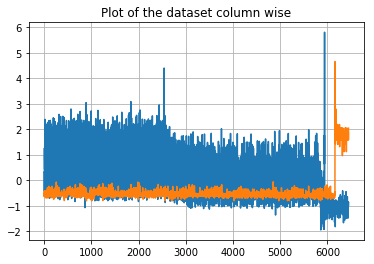

Network dimensions are 8 x 7 


Shape of differenced Training data : (6448, 2)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222673148 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531222673148

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222673148'}]}

Giving test_frac parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1         

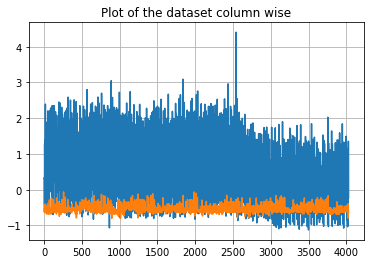

Network dimensions are 8 x 7 


Shape of differenced Training data : (4030, 2)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222673740 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531222673740

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222673740'}]}


In [17]:
for key in list(training_args1.keys()):
    print("\nGiving {} parameter : ''\n".format(key))
    model_input_args1 = model_input_args()
    del training_args1[key]
#     training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    print(train_res)

#### Evaluation args

In [18]:
for key in list(eval_args().keys()):
    eval_args1 = eval_args()
    del eval_args1[key]
    eval_args1['model_path'] = train_res['models'][0][assetno[0]]

#     json_data = reader_helper.read(reader_kwargs1)
    eval_args1['to_plot']=False
    test_res = som_wrapper.evaluate(**eval_args1,json_data=json_data)
    print(test_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.504288  

Shape of the Entire dataset : torch.Size([8061, 2])

Input data's shape: (8061, 2)
Differenced data shape (8060, 2)
(8060,)

No of anomalies detected : 97, Fraction of data detected as anomaly : 0.012033246495

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.504288  

Shape of the Entire dataset : torch.Size([8061, 2])

Input data's shape: (8061, 2)
Differenced data shape (8060, 2)
(8060,)

No of anomalies detected : 97, Fraction of data detected as anomaly : 0.012033246495472025

 No of Anomalies d

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.504288  

Shape of the Entire dataset : torch.Size([8061, 2])

Input data's shape: (8061, 2)
Differenced data shape (8060, 2)
(8060,)

No of anomalies detected : 97, Fraction of data detected as anomaly : 0.012033246495472025

 No of Anomalies detected = 97
{"header": {"code": "200", "

## Test 3:
#### Testing parameter type mismatch 

### Mismatched params arguments

In [19]:
train_vals = {'batch_size': 4.5,
             'epochs': 5.5,
             'is_train': 'True',
             'test_frac': 3.0,
             'to_plot': 'True'}

model_vals = {'N': '100',
             'diff_order': 1.4,
             'init_learning_rate': 1,
             'init_radius': 'f',
             'input_feature_size': 'ff',
             'minNumPerBmu': 2,
             'network_shape': ('8', 8),
             'no_of_neighbours': 34.4,
             'time_constant': 'None'}

eval_vals = {
            'model_path':34,
            'to_plot':'True',
            'anom_thres':4
}

####  Testing training args


Giving is_train parameter : True

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.504288  

Shape of the Entire dataset : torch.Size([8061, 2])

torch.float64
Shape of Training dataset :torch.Size([6449, 2]) and Test dataset :torch.Size([1613, 2])

Dataset has 6449 

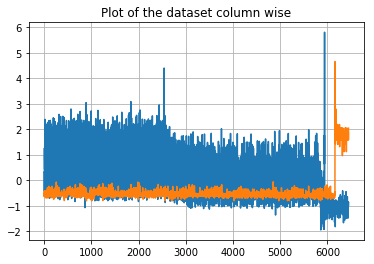

Network dimensions are 8 x 7 


Shape of differenced Training data : (6448, 2)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222675258 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531222675258

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222675258'}]}

Giving epochs parameter : 5.5

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'int'>", 'data': {'argument': 'epochs', 'value': 5.5}}

Giving batch_size parameter : 4.5

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'int'>", 'data': {'argument': 'batch_size', 'value': 4.5}}

Giving to_plot paramet

Traceback (most recent call last):
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_wrapper.py", line 204, in train
    model_path = (anomaly_detector.detect_anomalies())
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 120, in detect_anomalies
    to_plot=self.training_args['to_plot'])
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 199, in process_data
    train_data,test_data = split_the_data(data_set,test_frac=test_frac)
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 173, in split_the_data
    train_data = data[0:int(np.ceil((1-test_frac)*data[:,].shape[0])),:]
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 163, in __getitem__
    sample = self.da

In [20]:
for i,key in enumerate(list(training_args().keys())):
    print("\nGiving {} parameter : {}\n".format(key,train_vals[key]))
    model_input_args1 = model_input_args()
    training_args1 = training_args()
    training_args1[key] = train_vals[key]
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    print(train_res)

####  Testing model input args


Giving network_shape parameter : ('8', 8)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.504288  

Shape of the Entire dataset : torch.Size([8061, 2])

torch.float64
Shape of Training dataset :torch.Size([6449, 2]) and Test dataset :torch.Size([1613, 2])

Dataset 

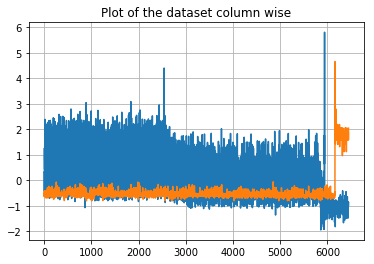

Network dimensions are 8 x 7 

{'code': '500', 'status': 'Unknown Exception', 'message': 'an integer is required (got type str)'}

Giving input_feature_size parameter : ff

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.504288  

Shape of the Entire dataset : torch.

Traceback (most recent call last):
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_wrapper.py", line 204, in train
    model_path = (anomaly_detector.detect_anomalies())
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 124, in detect_anomalies
    net = create_cum_train_som(train_data,self.model_input_args,self.training_args)
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 402, in create_cum_train_som
    model = som_knn_module.Som_model(**model_input_args)
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_module.py", line 29, in __init__
    self.weights = torch.rand((*self.shape,self.feature_size),dtype=torch.float64)
TypeError: an integer is required (got type str)


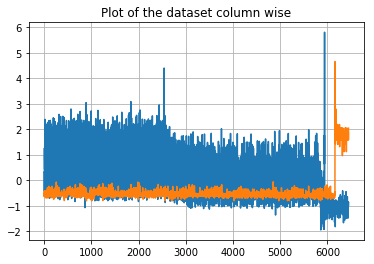

Network dimensions are 8 x 7 


Shape of differenced Training data : (6448, 2)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222676735 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531222676735

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222676735'}]}

Giving time_constant parameter : None

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
13923

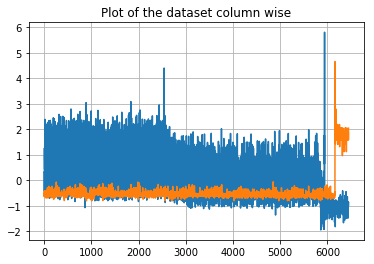

Network dimensions are 8 x 7 


Shape of differenced Training data : (6448, 2)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222677593 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531222677593

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222677593'}]}

Giving minNumPerBmu parameter : 2

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
139238850

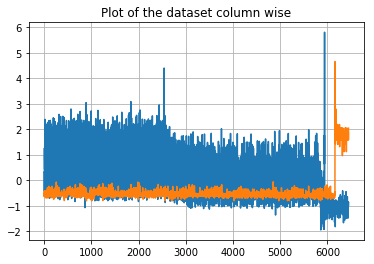

Network dimensions are 8 x 7 


Shape of differenced Training data : (6448, 2)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222678416 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1531222678416

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_rdscpuutilizationcc0c53_TSFAD_A1_1531222678416'}]}

Giving no_of_neighbours parameter : 34.4

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'int'>", 'data': {'argument': 'no_of_neighbors', 'value': 34.4}}

Giving init_radius parameter : f

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'float'>", 'data': {'argument': 'initial_radius', 'value': 'f'

In [21]:
for i,key in enumerate(list(model_input_args().keys())):
    print("\nGiving {} parameter : {}\n".format(key,model_vals[key]))
    training_args1 = training_args()
    model_input_args1 = model_input_args()
    model_input_args1[key] = model_vals[key]
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    print(train_res)

#### Testing eval args

In [22]:
training_args1 = training_args()
model_input_args1 = model_input_args()
training_args1['to_plot'] = False

train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533  \
timestamp                                             
1392388200000  TSFAD_A1                    0.325137   
1392388320000  TSFAD_A1                    0.325137   
1392388500000  TSFAD_A1                    0.325137   
1392388620000  TSFAD_A1                   -0.433697   
1392388800000  TSFAD_A1                   -0.433697   

               rds_cpu_utilization_cc0c53  
timestamp                                  
1392388200000                   -0.452781  
1392388320000                   -0.452781  
1392388500000                   -0.628123  
1392388620000                   -0.628123  
1392388800000                   -0.504288  

Shape of the Entire dataset : torch.Size([8061, 2])

torch.float64
Shape of Training dataset :torch.Size([6449, 2]) and Test dataset :torch.Size([1613, 2])

Network dimensions are 8 x 7 


Shape of differenced

In [23]:
eval_vals

{'anom_thres': 4, 'model_path': 34, 'to_plot': 'True'}

In [24]:
for key in list(eval_args().keys()):
    eval_args1 = eval_args()
    eval_args1[key] = eval_vals[key]

    test_res = som_wrapper.evaluate(**eval_args1,json_data=json_data)
    print(test_res)

{"code": "400", "status": "Bad Request", "message": "should be of type <class 'str'>", "data": {"argument": "model_path", "value": 34}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'bool'>", "data": {"argument": "to_plot", "value": "True"}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "anom_thres", "value": 4}}


### User Defined Test Case:
#### Testing the data missing case

In [25]:
reader_kwargs1 = reader_kwargs()
reader_kwargs1['from_timestamp'] = int(2**40)

json_data = reader_helper.read(reader_kwargs=reader_kwargs1)

model_input_args1 = model_input_args()
training_args1 = training_args()
training_args1['to_plot']=False
train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
print(train_res)

Data reader initialised 

{'code': '400', 'status': 'Bad Request', 'message': 'Expecting value: line 1 column 1 (char 0),from_timestamp has to be less than to_timestamp!', 'data': {}}


## Test 6:
#### Testing Asset Timeline Logging :

## Test 7:
#### Testing the response from program to follow agreed upon template :

In [26]:
reader_kwargs1 = csv_helper.get_csv_kwargs(infile='../../dataset/lstm_train_data_201B.csv',
                                          filename='lstm_train_data_201B.csv',has_time=False)

json_data = reader_helper.read(reader_kwargs1)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
               assetno  avg_gbx_hspd_de_hrz_vibration  \
timestamp                                              
18880200000  TSFAD_A1                      -0.554718   
18880800000  TSFAD_A1                      -0.600756   
18881400000  TSFAD_A1                      -0.615003   
18882000000  TSFAD_A1                      -0.527696   
18882600000  TSFAD_A1                      -0.558133   

             avg_gbx_hspd_nde_hrz_vibration  avg_gbx_lspd_de_hrz_vibration  \
timestamp                                                                    
18880200000                       -0.754790                      -0.417707   
18880800000                       -0.742405                      -0.391525   
18881400000                       -0.734311                      -0.367526   
18882000000                       -0.678824                      -0.323202   
18882600000                       -0.693159

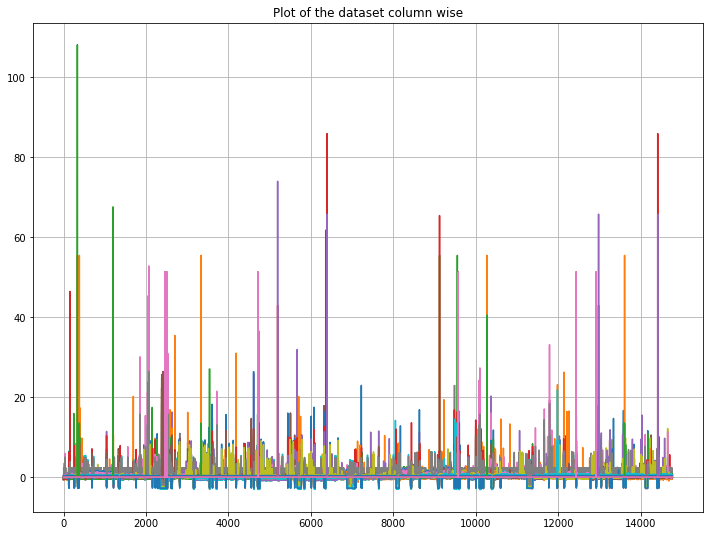

Network dimensions are 4 x 13 


Shape of differenced Training data : (14764, 47)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_avggbxhspddehrzvibration_avggbxhspdndehrzvibration_avggbxlspddehrzvibration_avggbxlspdndehrzvibration_avgmotordebrghrzvibration_avgmotordebrgvrtvibration_avgmotorndebrghrzvibration_avgmotorndebrgvrtvibration_avgpinbrgdehrzvibration_avgpinbrgdevrtvibration_avgpinbrgndehrzvibration_avgpinbrgndevrtvibration_gbxissuecount_gbxissuerating_kurtgbxhspddehrzvibration_kurtgbxhspdndehrzvibration_kurtgbxlspddehrzvibration_kurtgbxlspdndehrzvibration_kurtmotordebrghrzvibration_kurtmotordebrgvrtvibration_kurtmotorndebrghrzvibration_kurtmotorndebrgvrtvibration_kurtpinbrgdehrzvibration_kurtpinbrgdevrtvibration_kurtpinbrgndehrzvibration_kurtpinbrgndevrtvibration_loadissuecount_loadissuerating_maxgbxhspddehrzvibration_maxgbxhspdndehrzvibration_maxgbxls

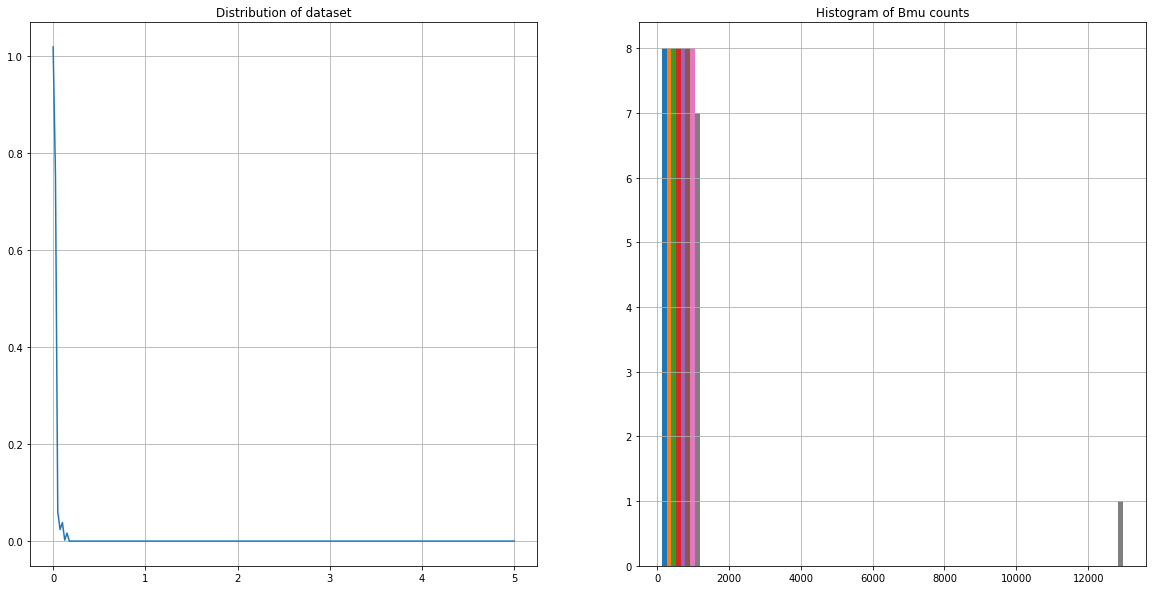

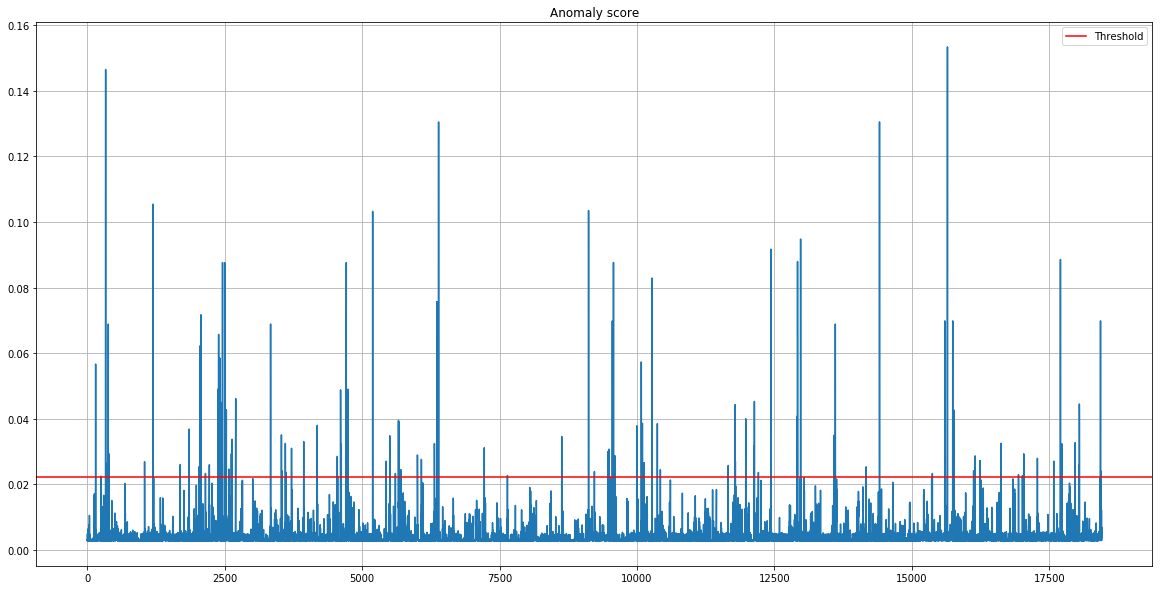

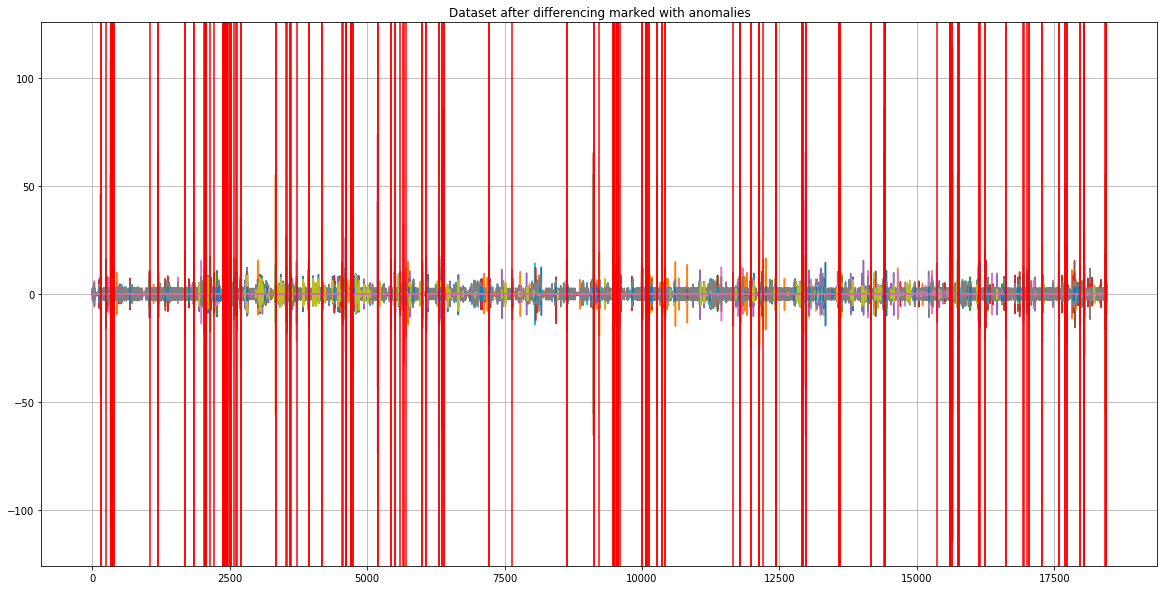

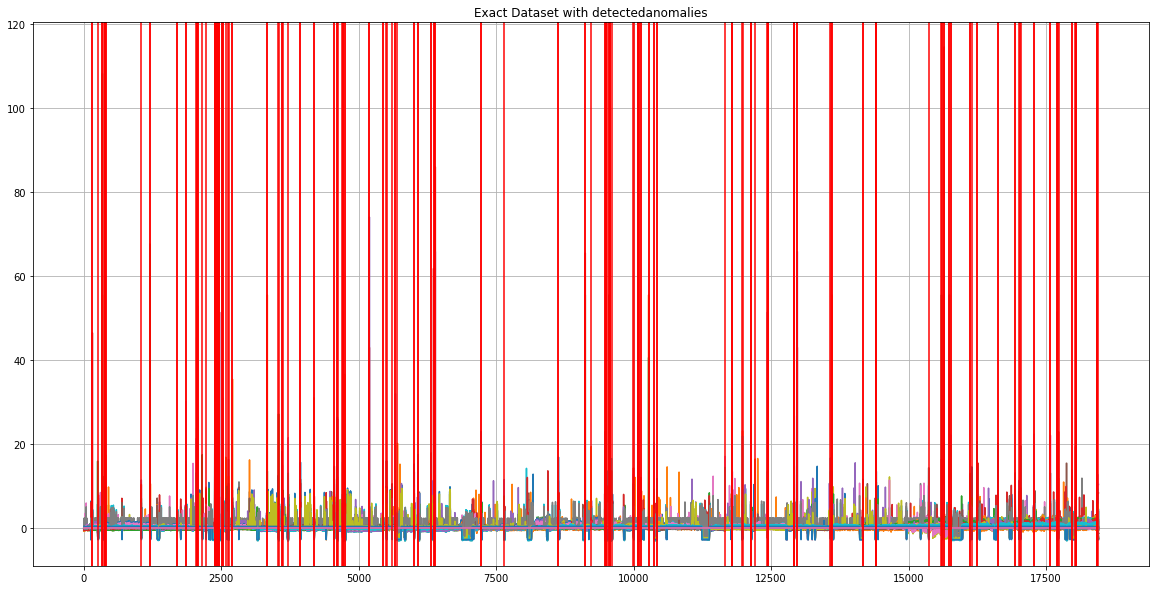


No of anomalies detected : 220, Fraction of data detected as anomaly : 0.011920242739488513

 No of Anomalies detected = 220
{"header": {"code": "200", "status": "OK"}, "body": [{"asset": "TSFAD_A1", "anomalies": [{"name": "avg_gbx_hspd_de_hrz_vibration", "datapoints": [{"from_timestamp": 18972000000, "to_timestamp": 18972000000, "anomaly_timestamp": [18972000000], "anomaly_code": "som"}, {"from_timestamp": 18972600000, "to_timestamp": 18972600000, "anomaly_timestamp": [18972600000], "anomaly_code": "som"}, {"from_timestamp": 19029600000, "to_timestamp": 19029600000, "anomaly_timestamp": [19029600000], "anomaly_code": "som"}, {"from_timestamp": 19081200000, "to_timestamp": 19081200000, "anomaly_timestamp": [19081200000], "anomaly_code": "som"}, {"from_timestamp": 19081800000, "to_timestamp": 19081800000, "anomaly_timestamp": [19081800000], "anomaly_code": "som"}, {"from_timestamp": 19087800000, "to_timestamp": 19087800000, "anomaly_timestamp": [19087800000], "anomaly_code": "som"}, {"

In [39]:
training_args1 = training_args()
model_input_args1 = model_input_args()
training_args1['to_plot']=True

train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))

eval_args1 = eval_args()
print(train_res)
eval_args1['model_path'] = train_res['models'][0][assetno[0]]
test_res = som_wrapper.evaluate(**eval_args1,json_data=json_data)
print(test_res)

## Test 8:
#### Testing No Data exception :
* To get empty dataframe we set from and to timestamp to be not in range of the timestamps in dataset analysed

## Test 9:
#### Testing Database connectivity  exception :
* To test this we edit the db properties and run the algo

In [ ]:
writer_configs.table_name = 'f'

In [ ]:
db_properties.db_connection

### We change the db name and we expect a database error as shown below

In [ ]:
db_properties.db_connection['dbname'] = 'eg'

### Now we try to change the password of db properties and observe the exception handled

In [ ]:
db_properties.db_connection['password']='fef'

In [ ]:
%%writefile_run db_properties.py

db_connection = {'dbname': 'Cerebra',
 'host': '127.0.0.1',
 'password': 'givemeachance',
 'port': '5432',
 'user': 'postgres'}

### Now we change the table name in which we are writing, and we observe that relation doesn't exist as seen below

In [ ]:
writer_configs.table_name = 'ffee'

In [ ]:
writer_configs.table_name = 'public.log_asset_timeline'

## Test 10:
#### Testing random exceptions :

## Test 11:
#### Testing High Performance :

In [ ]:
reader_kwargs1= csv_helper.get_csv_kwargs(infile='../../dataset/bearings.csv',filename='bearings.csv',has_time=False)
json_data = reader_helper.read(reader_kwargs=reader_kwargs1)
model_input_args1,training_args1,eval_args1 = get_kwargs()

In [ ]:
%%timeit -n 1 -r 1

training_args1['to_plot']=False
training_args1['epochs']= 10
training_args1['batch_size'] = 32
train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))

eval_args1['anom_thres'] = 1
eval_args1['model_path'] = train_res['models'][0][assetno[0]]
eval_args1['to_plot']=False
test_res = som_wrapper.evaluate(**eval_args1,json_data=json_data,mode=som_wrapper.mode_options[1])
print(test_res)

# Conclusion:
* Hence we observe that **Bayesian Changepoint Detection** works well only on level shifts or variational shift datasets over outlier or surge,sag datasets